In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4796.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4897.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4626.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4717.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4932.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4008.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4982.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4220.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4692.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4260.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4454.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4704.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4307.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4522.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4135.jpg
/kaggle/input/cat-and-dog/test_set/test_set/cats/cat.4643.jpg
/kaggle/

In [2]:
import torch 
import torch.nn as nn
from torch.utils.data import DataLoader

import torchvision

from torchvision import datasets, transforms
from torchvision.transforms import ToPILImage

In [3]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

from PIL import Image

In [4]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

train_trans = transforms.Compose([
    transforms.RandomSizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    normalize,
])

test_trans = transforms.Compose([
    transforms.Scale(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    normalize,
])

/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:697: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +
/opt/conda/lib/python3.7/site-packages/torchvision/transforms/transforms.py:210: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +


In [5]:
train_data = datasets.ImageFolder('../input/cat-and-dog/training_set/training_set/', transform=train_trans)
test_data = datasets.ImageFolder('../input/cat-and-dog/test_set/test_set/', transform=test_trans)

In [6]:
train_loader = torch.utils.data.DataLoader(train_data,
    batch_size=100,
    shuffle=True)
    

test_loader = torch.utils.data.DataLoader(test_data,
    batch_size=100,
    shuffle=False)

In [7]:
to_pil = transforms.ToPILImage()

In [8]:
def show_data(data_sample):
    result = to_pil(data_sample)
    plt.imshow(result)
    plt.title('y = '+ str(data_sample[1]))

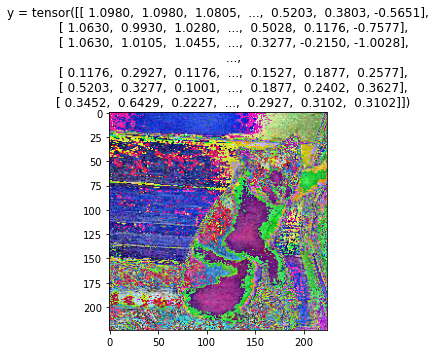

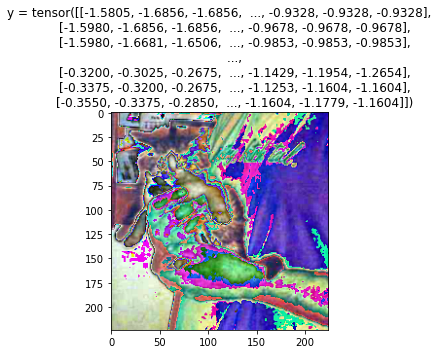

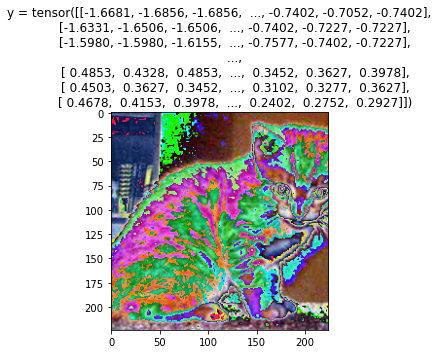

In [9]:
for n,data_sample in enumerate(test_data):
    show_data(data_sample[0])
    plt.show()
    if n==2:
        break        

In [10]:
from torchvision.models import resnet50
model = resnet50(pretrained=True).cuda()
    
for param in model.parameters():
    param.requires_grad = False   
    
model.fc = nn.Sequential(
               nn.Linear(2048, 270),
               nn.ReLU(inplace=True),
               nn.Linear(270,90 ),
               nn.ReLU(inplace=True),
               nn.Linear(90,2),
               nn.Softmax(dim=1)).cuda()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [11]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [12]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.003)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
)

In [13]:
train_acc=[]
val_acc=[]
loss_list=[]
for epoch in range(10):
    corr = 0
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        x = x.cuda()
        y = y.cuda()
        preds = model(x)
        loss = criterion(preds, y)
        loss.backward()
        optimizer.step()
        loss_list.append(loss.data)
        _, yhat = torch.max(preds.data, 1)
        corr += (yhat == y).sum().item()
        print(".",end='',flush = True )
    
    acc = corr/len(train_data)
    print("Training Accuracy at epoch",epoch+1,"is: ",acc)
    train_acc.append(acc)
    
    correct=0
    with torch.no_grad():
        for x_test, y_test in test_loader:
            model.eval()
            x_test = x_test.cuda()
            y_test = y_test.cuda()
            z = model(x_test)
            _, yhat1 = torch.max(z.data, 1)
            correct += (yhat1 == y_test).sum().item()
    accuracy = correct / len(test_data)
    print("Validation Accuracy at epoch",epoch+1,"is: ",accuracy)
    val_acc.append(accuracy)     

.................................................................................Training Accuracy at epoch 1 is:  0.9025608994378513
Validation Accuracy at epoch 1 is:  0.9841819080573406
.................................................................................Training Accuracy at epoch 2 is:  0.9361648969394128
Validation Accuracy at epoch 2 is:  0.9792387543252595
.................................................................................Training Accuracy at epoch 3 is:  0.9391630231105559
Validation Accuracy at epoch 3 is:  0.9742956005931784
.................................................................................Training Accuracy at epoch 4 is:  0.9364147407870081
Validation Accuracy at epoch 4 is:  0.9856648541769649
.................................................................................Training Accuracy at epoch 5 is:  0.9496564647095566
Validation Accuracy at epoch 5 is:  0.9841819080573406
.......................................................

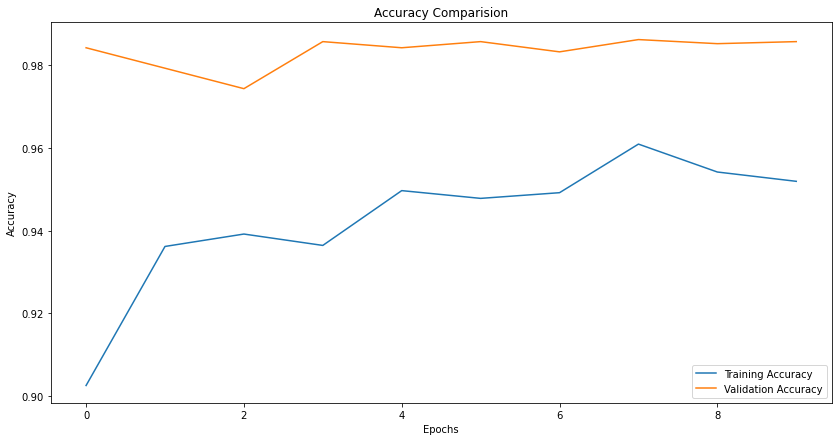

In [14]:
plt.figure(figsize=(14,7))
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Comparision')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

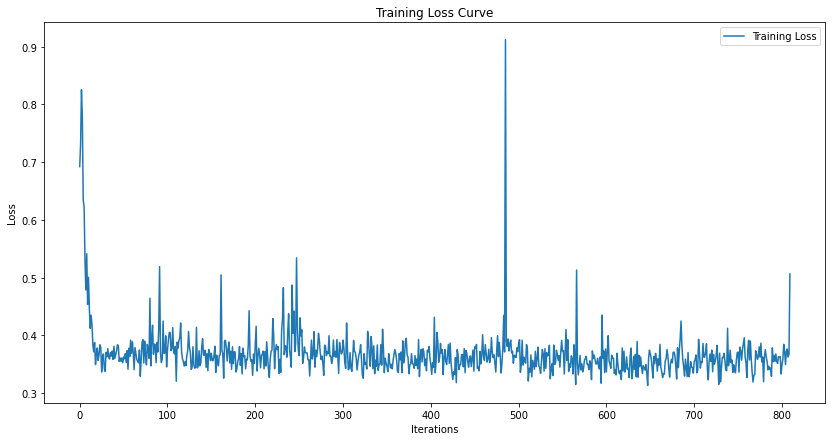

In [15]:
plt.figure(figsize=(14,7))
plt.plot(loss_list,label='Training Loss')
plt.title('Training Loss Curve')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()

In [16]:
!mkdir models
!mkdir models/pytorch

In [17]:
torch.save(model.state_dict(), 'models/pytorch/model.pth')